In [1]:
import requests
from bs4 import BeautifulSoup as bs 

url='https://www.weather.go.kr/weather/observation/currentweather.jsp'
response =requests.get(url)
soup=bs(response.content,'html.parser')

table=soup.find('table',{'class':'table_develop3'})
data=[]
for tr in table.find_all('tr'):
    tds= list(tr.find_all('td'))
    
    for td in tds:
        if td.find('a'):
            point=td.find('a').text
            temperature=tds[5].text
            humidity=tds[9].text
            data.append([point,temperature,humidity])
data

[['강릉', '25.7', '95'],
 ['강진군', '23.8', '95'],
 ['강화', '24.9', '100'],
 ['거제', '24.3', '97'],
 ['거창', '23.3', '99'],
 ['경주시', '24.0', '98'],
 ['고산', '26.3', '90'],
 ['고창', '24.5', '100'],
 ['고창군', '24.2', '95'],
 ['고흥', '24.1', '99'],
 ['광양시', '24.0', '92'],
 ['광주', '25.0', '99'],
 ['구미', '24.4', '97'],
 ['군산', '25.1', '98'],
 ['금산', '24.6', '100'],
 ['김해시', '25.0', '97'],
 ['남원', '23.5', '100'],
 ['남해', '23.9', '98'],
 ['대관령', '21.0', '98'],
 ['대구', '26.8', '86'],
 ['대전', '25.7', '97'],
 ['동두천', '24.7', '100'],
 ['동해', '23.9', '99'],
 ['목포', '25.7', '96'],
 ['문경', '23.8', '100'],
 ['밀양', '24.1', '96'],
 ['백령도', '22.7', '100'],
 ['보령', '24.5', '96'],
 ['보성군', '24.3', '100'],
 ['보은', '24.0', '100'],
 ['봉화', '23.1', '100'],
 ['부산', '26.0', '92'],
 ['부안', '25.4', '100'],
 ['부여', '24.9', '98'],
 ['북강릉', '24.4', '98'],
 ['북춘천', '24.6', '100'],
 ['산청', '23.6', '100'],
 ['상주', '24.2', '100'],
 ['서귀포', '25.3', '91'],
 ['서산', '23.8', '97'],
 ['서울', '24.9', '99'],
 ['성산', '24.9', '90'],
 ['세종', 

In [52]:
with open('weather.csv','w') as file:
    file.write('point,temperature,humidity\n')
    for i in data:
        file.write(f'{i[0]},{i[1]},{i[2]}\n')

In [53]:
%matplotlib inline
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

df=pd.read_csv('weather.csv',index_col='point',encoding='euc-kr')
df

,temperature,humidity
point,,
강릉,25.7,95
강진군,23.8,95
강화,24.9,100
거제,24.3,97
거창,23.3,99
...,...,...
합천,23.9,100
해남,23.3,99
홍성,24.7,97


In [54]:
city_df=df.loc[['서울','인천','대전','대구','광주','부산','울산','제주','울릉도']]
city_df

,temperature,humidity
point,,
서울,24.9,99
인천,24.8,96
대전,25.7,97
대구,26.8,86
광주,25.0,99
부산,26.0,92
울산,25.5,98
제주,26.7,86
울릉도,25.6,96


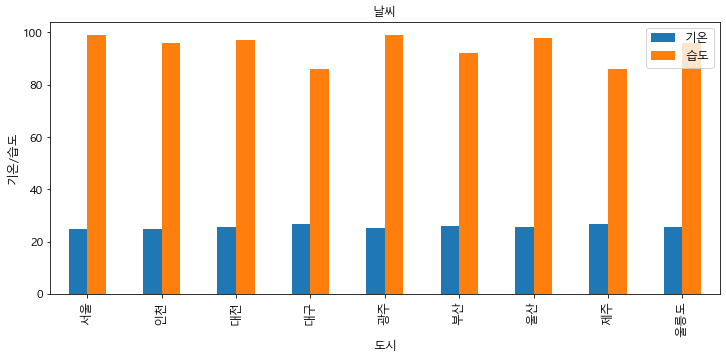

In [55]:
font_name= mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font',family=font_name)
ax=city_df.plot(kind='bar',title='날씨',figsize=(12,5),legend=True,fontsize=12)
ax.set_xlabel('도시',fontsize=12)
ax.set_ylabel('기온/습도',fontsize=12)
ax.legend(['기온','습도'],fontsize=12)

In [66]:
city_df['temperature'].argmax()

3